In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
      --------------------------------------- 0.1/8.1 MB 6.8 MB/s eta 0:00:02
      --------------------------------------- 0.1/8.1 MB 6.8 MB/s eta 0:00:02
      --------------------------------------- 0.1/8.1 MB 1.0 MB/s eta 0:00:08
     - -------------------------------------- 0.2/8.1 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.2/8.1 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.3/8.1 MB 1.2 MB/s eta 0:00:07
     --- ------------------------------------ 0.7/8.1 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/8.1 MB 2.3 MB/s eta 0:00:04
     ------ --------------------------------- 1.3/8.1 MB 3.0 MB/s eta 0:00:03
     ------- -------------------------------- 1.5/8.1 MB 3.1 MB/s eta 0:00:03
     -------- ------------------------------- 1.6/8.1 MB 3.1 MB/s eta 0:00:03
     --------- ------------------------------ 1.9/8.1 MB 3.4 MB/s eta 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [6]:
import pandas as pd
data = pd.read_csv(r"C:\Users\hp\Downloads\archive\titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

In [11]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [12]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [14]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


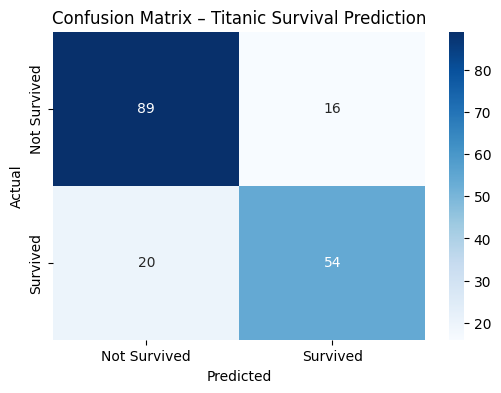

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Titanic Survival Prediction")
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 79.89%


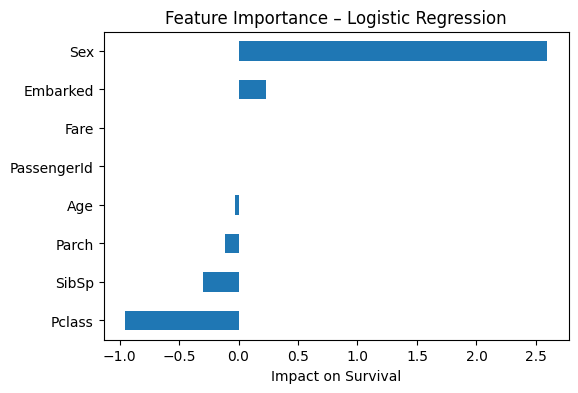

In [21]:
importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values()

plt.figure(figsize=(6,4))
importance.plot(kind='barh')
plt.title("Feature Importance – Logistic Regression")
plt.xlabel("Impact on Survival")
plt.show()